In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-FHV-services_jan-aug-2015.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Prestige_B01338.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Firstclass_B01536.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Skyline_B00111.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Lyft_B02510.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Dial7_B00887.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Diplo_B01196.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Federal_02216.csv
/kaggle/input/uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Highclass_B01717.csv
/kaggle/input/uber-pickups-in-ne

## Exploratory Data Analysis ##

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_all = pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv')

In [4]:
df_all.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [5]:
df_all.describe()

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [77]:
df_all.isna().sum()

dispatching_base_number     0
date                        0
active_vehicles             0
trips                       0
month                       0
dow                         0
trips_per_active_vehicle    0
dtype: int64

In [6]:
# check dispatch bases count
df_all['dispatching_base_number'].value_counts()

dispatching_base_number
B02512    59
B02765    59
B02764    59
B02682    59
B02617    59
B02598    59
Name: count, dtype: int64

In [8]:
# unique dates
df_all['date'].unique()

array(['1/1/2015', '1/2/2015', '1/3/2015', '1/4/2015', '1/5/2015',
       '1/6/2015', '1/7/2015', '1/8/2015', '1/9/2015', '1/10/2015',
       '1/11/2015', '1/12/2015', '1/13/2015', '1/14/2015', '1/15/2015',
       '1/16/2015', '1/17/2015', '1/18/2015', '1/19/2015', '1/20/2015',
       '1/21/2015', '1/22/2015', '1/23/2015', '1/24/2015', '1/25/2015',
       '1/26/2015', '1/27/2015', '1/28/2015', '1/29/2015', '1/30/2015',
       '1/31/2015', '2/1/2015', '2/2/2015', '2/3/2015', '2/4/2015',
       '2/5/2015', '2/6/2015', '2/7/2015', '2/8/2015', '2/9/2015',
       '2/10/2015', '2/11/2015', '2/12/2015', '2/13/2015', '2/14/2015',
       '2/15/2015', '2/16/2015', '2/17/2015', '2/18/2015', '2/19/2015',
       '2/20/2015', '2/21/2015', '2/22/2015', '2/23/2015', '2/24/2015',
       '2/25/2015', '2/26/2015', '2/27/2015', '2/28/2015'], dtype=object)

we find 6 unique dispatching base and all days across Jan and Feb 2015

In [70]:
# extract month and day of week
df_all['date'] = pd.to_datetime(df_all['date'])
df_all['month'] = pd.to_datetime(df_all['date']).dt.month
df_all['dow'] = pd.to_datetime(df_all['date']).dt.day_of_week

In [59]:
# get trips per active vehicle
df_all['trips_per_active_vehicle'] = df_all['trips'] / df_all['active_vehicles']

### analyze dispatching bases ###

Text(0.5, 1.0, 'Trips per active vehicle')

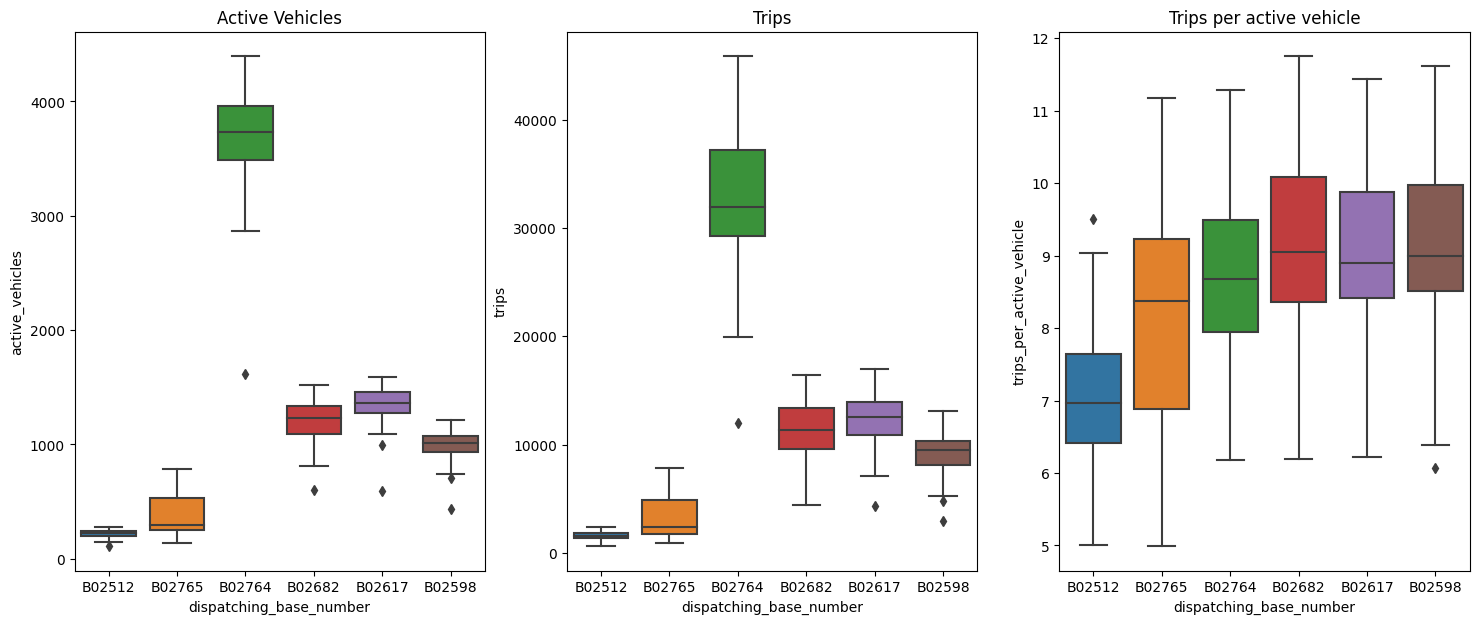

In [72]:
# look at distribution of each base
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))
sns.boxplot(x='dispatching_base_number', y='active_vehicles', data=df_all, ax=axes[0]).set_title(f'Active Vehicles')
sns.boxplot(x='dispatching_base_number', y='trips', data=df_all, ax=axes[1]).set_title(f'Trips')
sns.boxplot(x='dispatching_base_number', y='trips_per_active_vehicle', data=df_all, ax=axes[2]).set_title(f'Trips per active vehicle')

not many outliers present

Text(0.5, 1.0, 'Average Trips per Vehicle')

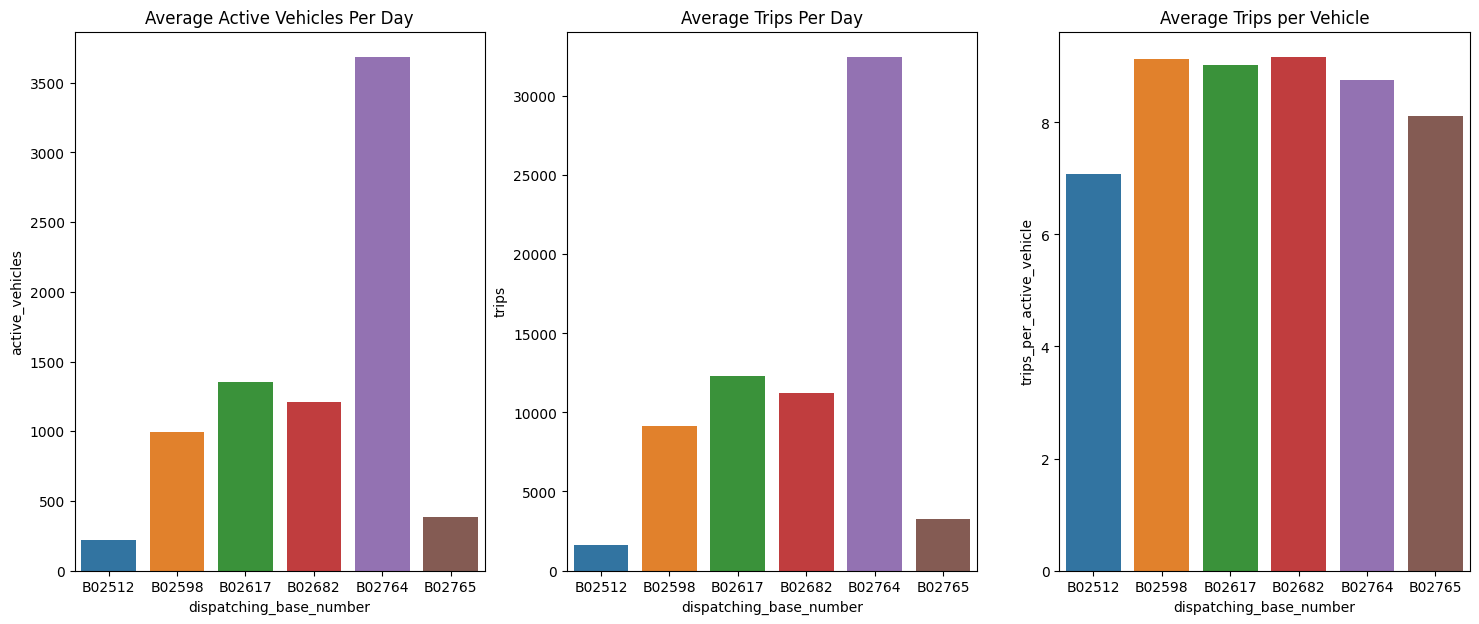

In [69]:
# look at averages
df_month_dispatch = df_all.groupby('dispatching_base_number')[['active_vehicles', 'trips', 'trips_per_active_vehicle']].mean()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))

sns.barplot(x=df_month_dispatch.index, y='active_vehicles', \
            data=df_month_dispatch, ax=axes[0]).set_title(f'Average Active Vehicles Per Day')
sns.barplot(x=df_month_dispatch.index, y='trips',\
            data=df_month_dispatch, ax=axes[1]).set_title(f'Average Trips Per Day')
sns.barplot(x=df_month_dispatch.index, y='trips_per_active_vehicle',\
            data=df_month_dispatch, ax=axes[2]).set_title(f'Average Trips per Vehicle')


B02764 has most trips and active vehicles, while B02512 has least. However despite having the largest number in both, B02764 doesn't have the highest trips to vehicle ratio. B02598 and B02682 have highest trip to vehicle ratio, which probably indicates that the drivers are more efficient / trips could be generally shorter.

In [60]:
# analyze each dispatching base's performance by month
df_month_dispatch = df_all.groupby(['month', 'dispatching_base_number'])[['active_vehicles', 'trips', 'trips_per_active_vehicle']].mean()

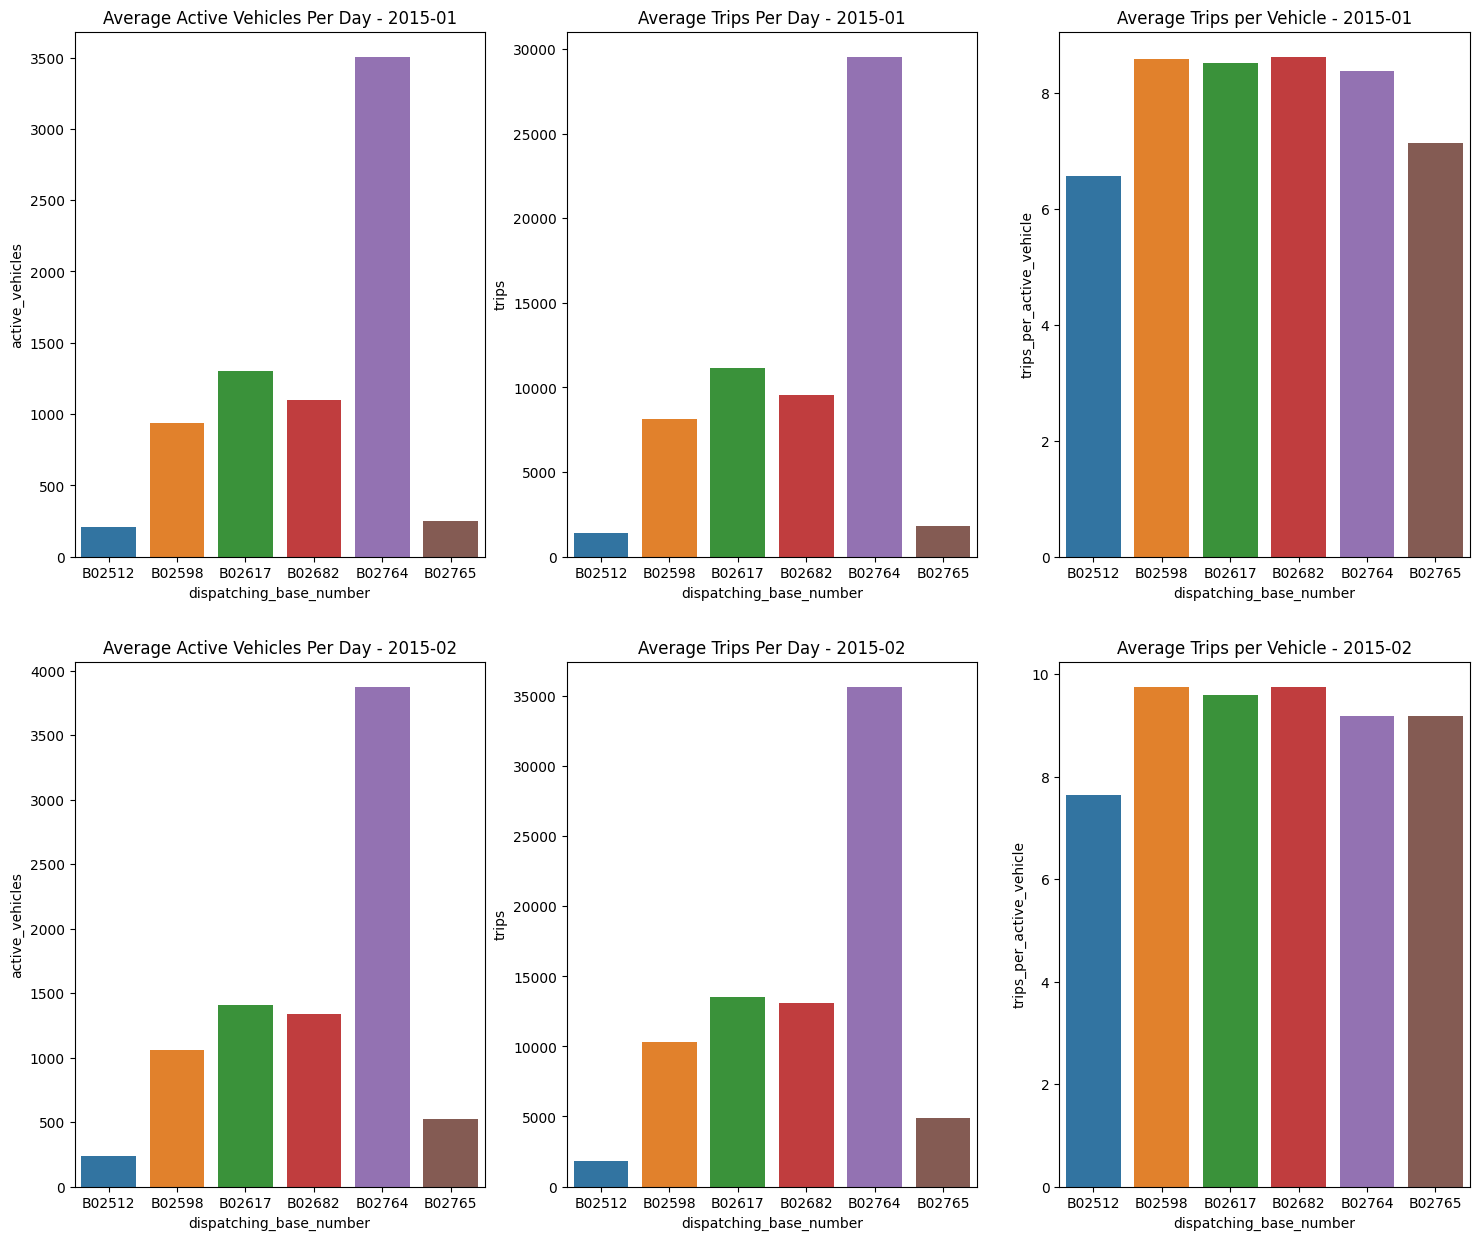

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 15))

for i in range(2):
    df_month_dispatch_curr = df_month_dispatch.loc[df_month_dispatch.index.get_level_values('month') == i+1]
    sns.barplot(x=df_month_dispatch_curr.index.get_level_values('dispatching_base_number'), y='active_vehicles', \
                data=df_month_dispatch_curr, ax=axes[i][0]).set_title(f'Average Active Vehicles Per Day - 2015-0{i+1}')
    sns.barplot(x=df_month_dispatch_curr.index.get_level_values('dispatching_base_number'), y='trips',\
                data=df_month_dispatch_curr, ax=axes[i][1]).set_title(f'Average Trips Per Day - 2015-0{i+1}')
    sns.barplot(x=df_month_dispatch_curr.index.get_level_values('dispatching_base_number'), y='trips_per_active_vehicle',\
                data=df_month_dispatch_curr, ax=axes[i][2]).set_title(f'Average Trips per Vehicle - 2015-0{i+1}')
    

performance across two months for each base seems to be consistent

### Time Analysis ###

/tmp/ipykernel_33/1194689827.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,i+1)


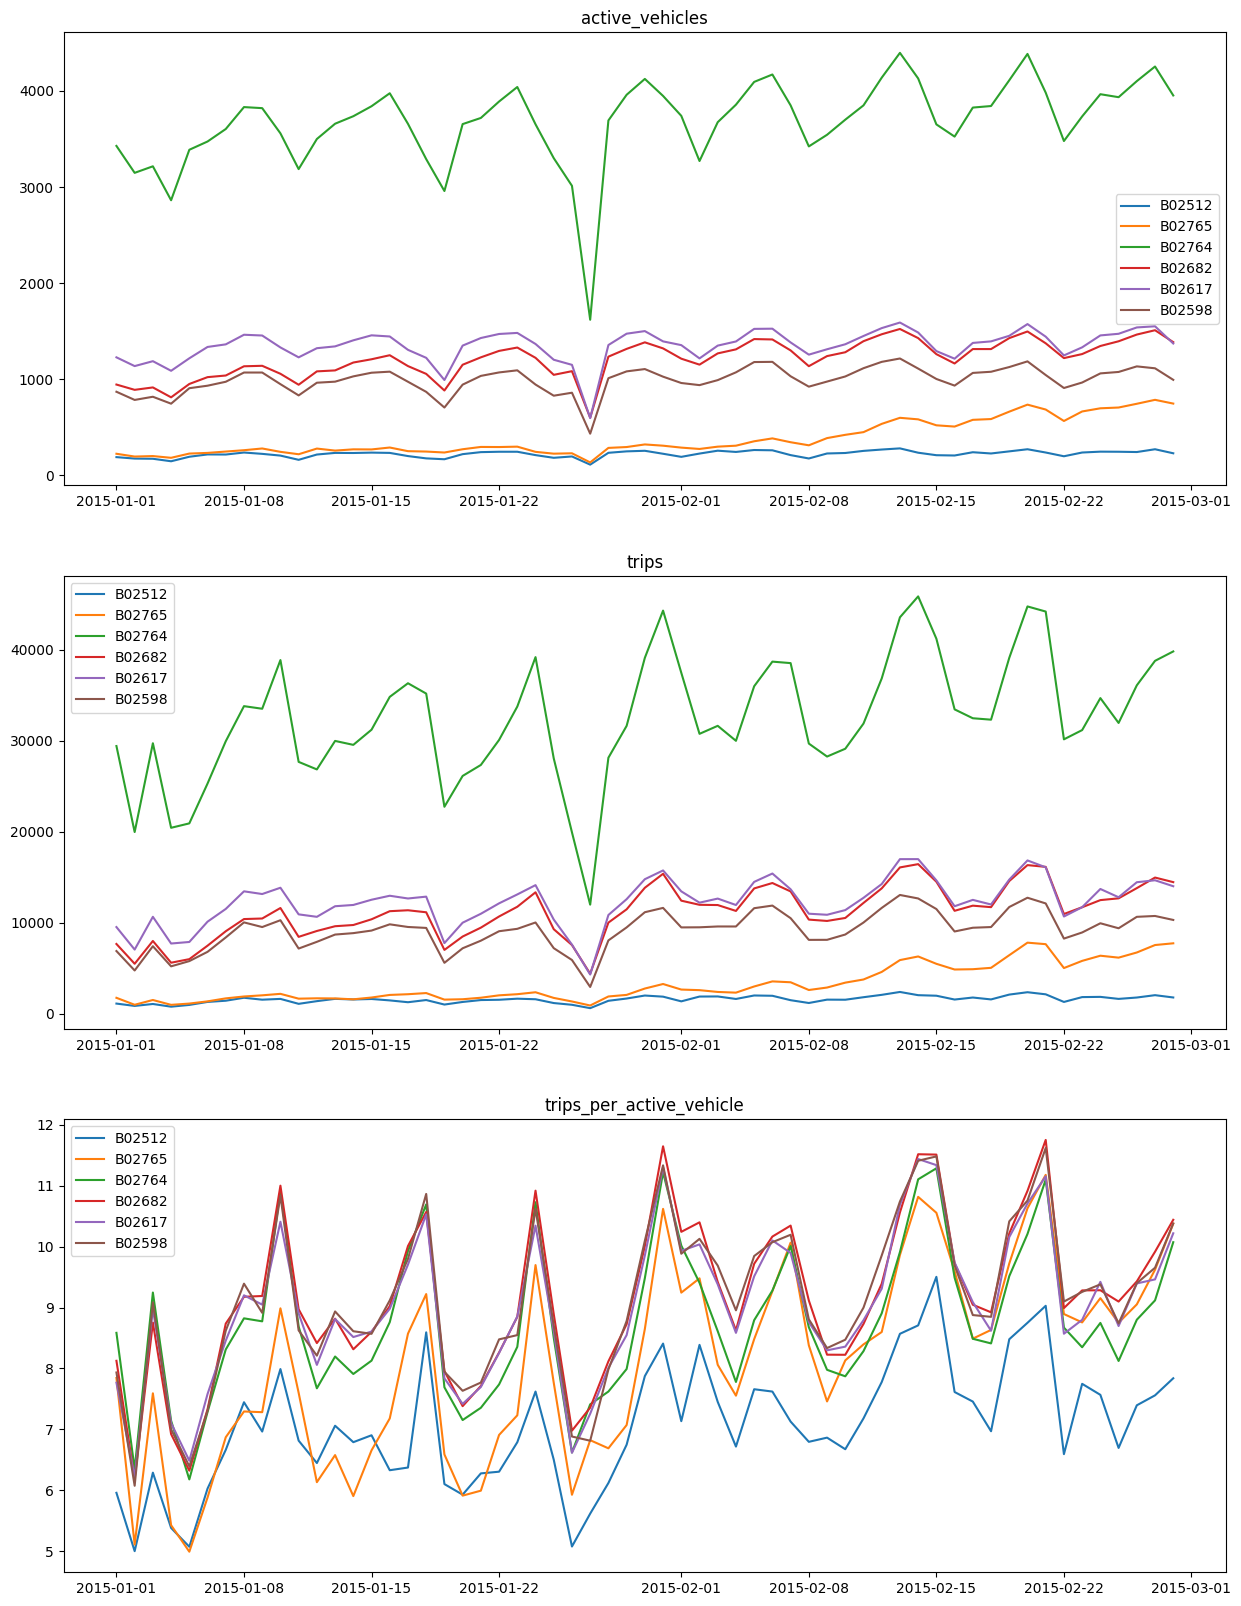

In [88]:
# plot trend across the two months
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 20))

for i, col in enumerate(['active_vehicles', 'trips', 'trips_per_active_vehicle']):
    plt.subplot(3,1,i+1)
    for base in df_all['dispatching_base_number'].unique():
        plt.plot(df_all[df_all['dispatching_base_number'] == base]['date'], df_all[df_all['dispatching_base_number'] == base][col],\
                label=base)
        plt.title(col)
        plt.legend()

we observe some seasonality patterns across weeks. Also there seems to be a pretty big dip around 2015-01-28 ish.

In [94]:
import datetime 
df_all[(df_all['date'] > datetime.datetime(2015,1,22)) & (df_all['date'] < datetime.datetime(2015,1,31))\
       & (df_all['dispatching_base_number'] == 'B02764')]

,dispatching_base_number,date,active_vehicles,trips,month,dow,trips_per_active_vehicle
135,B02764,2015-01-23,4040,33756,1,4,8.355446
139,B02764,2015-01-24,3652,39187,1,5,10.730285
145,B02764,2015-01-25,3300,28066,1,6,8.504848
153,B02764,2015-01-26,3012,19940,1,0,6.620186
161,B02764,2015-01-27,1619,11998,1,1,7.410747
162,B02764,2015-01-28,3692,28137,1,2,7.621073
169,B02764,2015-01-29,3959,31637,1,3,7.991159
177,B02764,2015-01-30,4124,39110,1,4,9.483511


there is a drastic drop on 01-27. According to the news, there was a blizzard in the city from 01-26 to 01-27. Let's remove this outlier from further analysis.

In [97]:
df_all_clean = df_all[(df_all['date'] != datetime.datetime(2015,1,26)) & (df_all['date'] != datetime.datetime(2015,1,27))]
df_all_clean

,dispatching_base_number,date,active_vehicles,trips,month,dow,trips_per_active_vehicle
0,B02512,2015-01-01,190,1132,1,3,5.957895
1,B02765,2015-01-01,225,1765,1,3,7.844444
2,B02764,2015-01-01,3427,29421,1,3,8.585060
3,B02682,2015-01-01,945,7679,1,3,8.125926
4,B02617,2015-01-01,1228,9537,1,3,7.766287
...,...,...,...,...,...,...,...
349,B02764,2015-02-28,3952,39812,2,5,10.073887
350,B02617,2015-02-28,1372,14022,2,5,10.220117
351,B02682,2015-02-28,1386,14472,2,5,10.441558
352,B02512,2015-02-28,230,1803,2,5,7.839130


In [99]:
df_all_clean['dow'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int32)

In [98]:
# group by day of week and examine the trend
df_all_dow = df_all_clean.groupby('dow')[['active_vehicles', 'trips', 'trips_per_active_vehicle']].mean()
df_all_dow

,active_vehicles,trips,trips_per_active_vehicle
dow,,,
0,1207.357143,10009.619048,8.037074
1,1319.333333,10900.404762,8.013971
2,1354.750000,11067.979167,7.920024
3,1404.074074,12326.796296,8.493741
4,1434.277778,13170.222222,8.763752
5,1329.388889,13913.425926,9.940565
6,1179.083333,10915.479167,8.782105


/tmp/ipykernel_33/1661801441.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,i+1)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


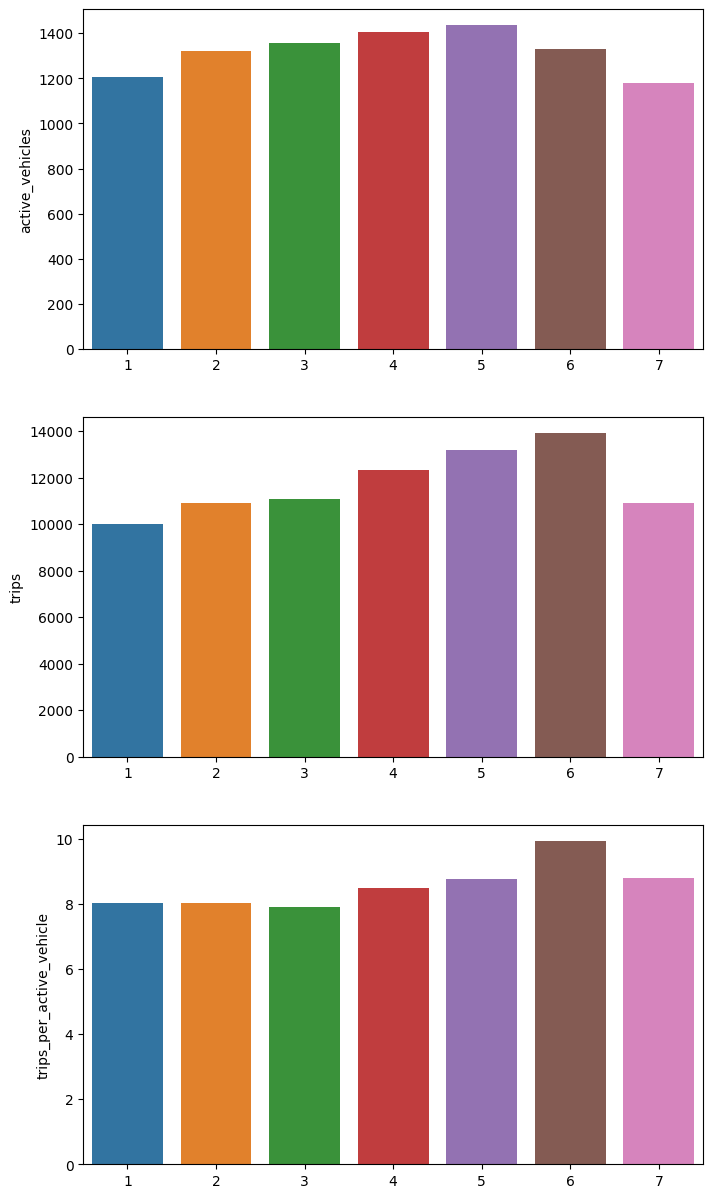

In [104]:
# plot trend across the two months
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 15))

for i, col in enumerate(['active_vehicles', 'trips', 'trips_per_active_vehicle']):
    plt.subplot(3,1,i+1)
    sns.barplot(x=[i+1 for i in df_all_dow.index], y=col, data=df_all_dow)

## Look at some additional data ##

In [5]:
df_raw = pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv')
df_raw.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [8]:
df_raw.shape

(14270479, 4)

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [10]:
df_raw.isnull().sum()

Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     162195
locationID                   0
dtype: int64

In [11]:
df_raw = df_raw.fillna('')

we have new columns Affiliated_base_num and locationID

In [113]:
df_raw['Affiliated_base_num'].unique()

array(['B02617', 'B02774', 'B02764', 'B02682', 'B02765', 'B00272',
       'B02401', 'B01087', 'B01197', 'B02512', 'B02729', 'B00227', nan,
       'B02598', 'B00013', 'B02003', 'B00628', 'B02818', 'B00254',
       'B02715', 'B01998', 'B02207', 'B02101', 'B02789', 'B02510',
       'B00412', 'B00111', 'B00477', 'B02806', 'B00448', 'B02664',
       'B02788', 'B01949', 'B02067', 'B00271', 'B02534', 'B02285',
       'B00837', 'B02770', 'B00277', 'B01877', 'B02522', 'B00014',
       'B00789', 'B02216', 'B01875', 'B02749', 'B02406', 'B00296',
       'B02507', 'B02787', 'B00053', 'B02345', 'B02670', 'B02822',
       'B01976', 'B00381', 'B00446', 'B02651', 'B02763', 'B01899',
       'B02732', 'B02016', 'B01913', 'B02588', 'B02644', 'B02835',
       'B02783', 'B02836', 'B02725', 'B02382', 'B02453', 'B02225',
       'B02772', 'B00888', 'B02499', 'B02815', 'B02712', 'B02277',
       'B02769', 'B02202', 'B02254', 'B02814', 'B00608', 'B02480',
       'B02847', 'B00235', 'B02780', 'B02776', 'B02472', 

In [129]:
df_raw['Dispatching_base_num'].unique() # now have 8 unique dispatch bases B02835 and B02836

array(['B02617', 'B02598', 'B02682', 'B02764', 'B02512', 'B02765',
       'B02835', 'B02836'], dtype=object)

In [111]:
df_raw[df_raw['Dispatching_base_num'] != df_raw['Affiliated_base_num']]

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
3,B02617,2015-05-17 09:47:00,B02774,80
7,B02617,2015-05-17 09:47:00,B02764,74
9,B02617,2015-05-17 09:47:00,B02764,22
20,B02617,2015-05-17 09:49:00,B02682,242
27,B02617,2015-05-17 09:50:00,B02764,234
...,...,...,...,...
14270468,B02765,2015-05-08 15:42:00,B02096,232
14270469,B02765,2015-05-08 15:42:00,B02764,79
14270473,B02765,2015-05-08 15:43:00,B02711,25
14270477,B02765,2015-05-08 15:44:00,B01899,45


about 3.5 million have different dispatch base and affiliated base. Still not sure what affiliated base is (could be destination location). Take a look at count.

In [124]:
df_raw_affiliate = df_raw.groupby('Affiliated_base_num').size()

<Axes: xlabel='Affiliated_base_num'>

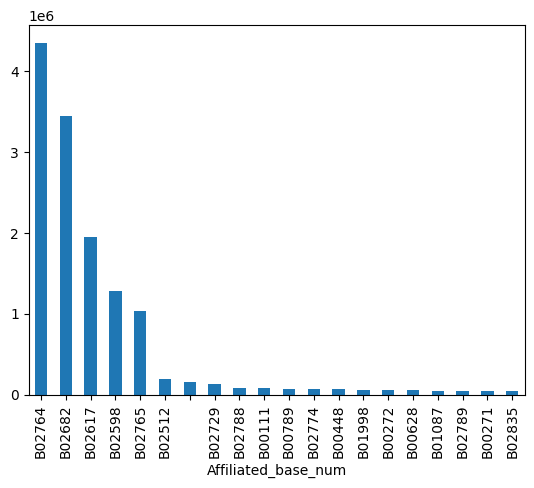

In [128]:
df_raw_affiliate.sort_values(ascending=False).iloc[:20].plot(kind='bar')

most common affiliated bases overlap with the dispatch bases.

In [116]:
df_raw['locationID'].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [131]:
df_raw_location = df_raw.groupby('locationID').size().sort_values(ascending=False)

<Axes: xlabel='locationID'>

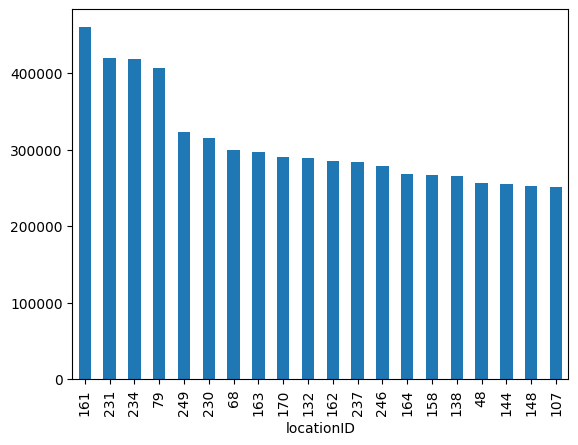

In [137]:
df_raw_location[:20].plot(kind='bar')

let's analyze the number of trips from each dispatch base again on 6 month's data

In [144]:
df_raw_dispatch = df_raw.groupby('Dispatching_base_num').size().sort_values(ascending=False)

In [148]:
df_raw_dispatch.index

Index(['B02764', 'B02682', 'B02617', 'B02598', 'B02765', 'B02512', 'B02835',
       'B02836'],
      dtype='object', name='Dispatching_base_num')

<Axes: xlabel='Dispatching_base_num'>

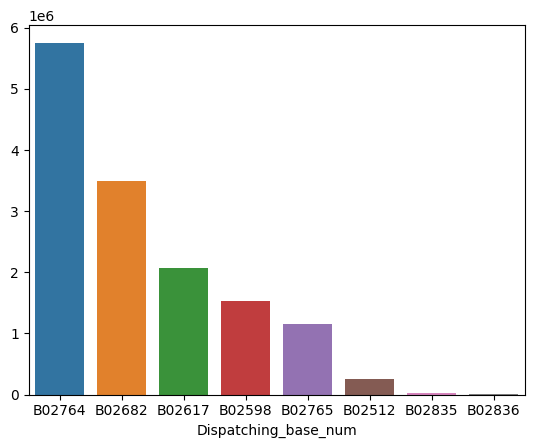

In [149]:
sns.barplot(x=df_raw_dispatch.index, y=df_raw_dispatch.values)

B02674 still have the most trips across all dispatch bases

### some analysis on the time domain ###

In [6]:
# extract some time dimensions from the data
df_raw['date'] = pd.to_datetime(df_raw['Pickup_date']).dt.date
df_raw['month'] = pd.to_datetime(df_raw['Pickup_date']).dt.month
df_raw['hour'] = pd.to_datetime(df_raw['Pickup_date']).dt.hour
df_raw['dow'] = pd.to_datetime(df_raw['Pickup_date']).dt.day_of_week
df_raw['dow'] = df_raw['dow'].apply(lambda x: x+1)

In [7]:
# by day 
df_raw_date = pd.DataFrame(df_raw.groupby('date').size())
df_raw_date = df_raw_date.set_index(pd.to_datetime(df_raw_date.index))
df_raw_date.columns = ['count']
df_raw_date.head()

,count
date,
2015-01-01,58045
2015-01-02,40287
2015-01-03,59844
2015-01-04,41943
2015-01-05,43678


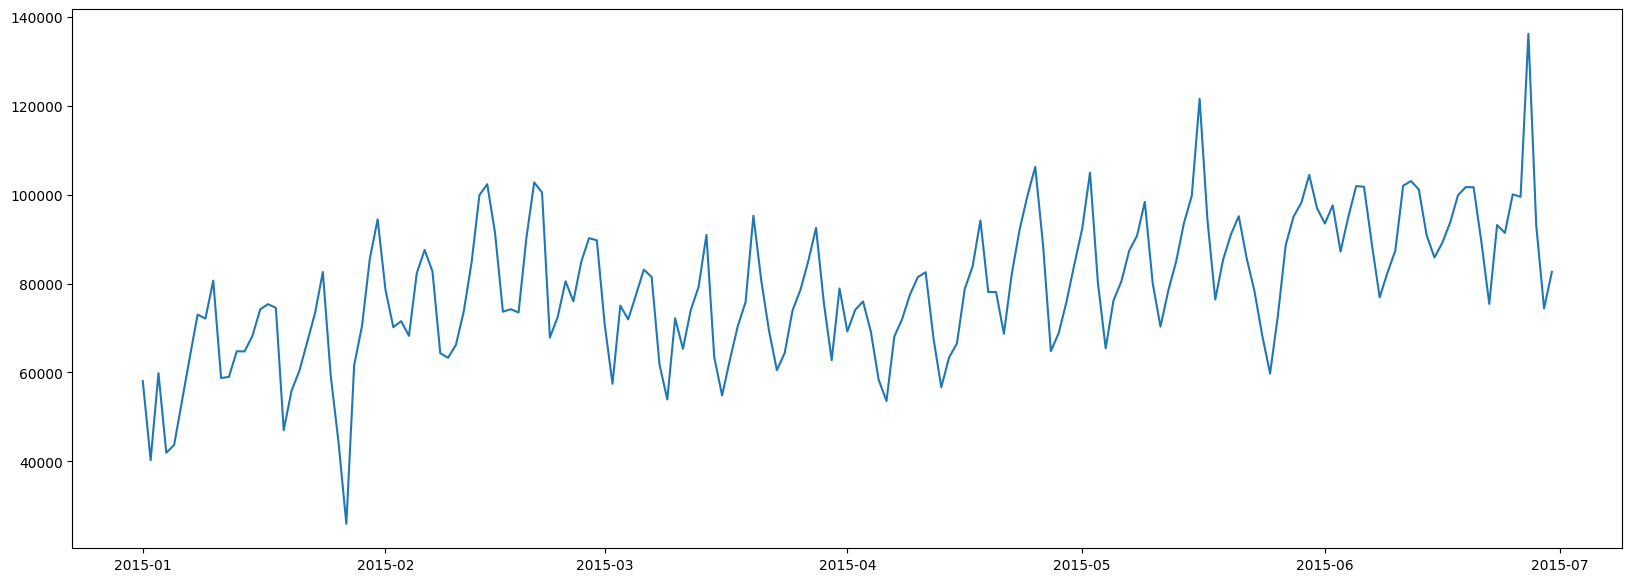

In [178]:
plt.figure(figsize=(20,7))
plt.plot(df_raw_date)

there is a general upward trend with some oscillation. There are a few peaks in mid-Feb, mid-May, and end of June. Let's look at these days.

In [197]:
df_raw_date.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2015-06-21', '2015-06-22', '2015-06-23', '2015-06-24',
               '2015-06-25', '2015-06-26', '2015-06-27', '2015-06-28',
               '2015-06-29', '2015-06-30'],
              dtype='datetime64[ns]', name='date', length=181, freq=None)

In [201]:
df_raw_date.loc['2015-02-12':'2015-02-22'] # spike around valentines day and around 02/20 (no significant event on 02/20)

,count
date,
2015-02-12,84751
2015-02-13,99897
2015-02-14,102347
2015-02-15,91320
2015-02-16,73672
2015-02-17,74221
2015-02-18,73493
2015-02-19,90271
2015-02-20,102762


In [202]:
df_raw_date.loc['2015-05-12':'2015-05-20'] # spike on 5/16, 9th Ave international food and street fair

,count
date,
2015-05-12,78437
2015-05-13,84937
2015-05-14,93624
2015-05-15,99756
2015-05-16,121557
2015-05-17,94322
2015-05-18,76414
2015-05-19,85371
2015-05-20,91062


In [203]:
df_raw_date.loc['2015-06-25':'2015-06-30'] # spike on 6/27, not exactly sure what's the event

,count
date,
2015-06-25,100073
2015-06-26,99508
2015-06-27,136193
2015-06-28,93108
2015-06-29,74430
2015-06-30,82627


Now let's add another dimension from dispatch base

In [158]:
df_raw_date_dispatch = df_raw.groupby(['Dispatching_base_num', 'date']).size()
df_raw_date_dispatch

Dispatching_base_num  date      
B02512                2015-01-01    1275
                      2015-01-02     933
                      2015-01-03    1157
                      2015-01-04     848
                      2015-01-05    1063
                                    ... 
B02836                2015-06-26      74
                      2015-06-27     103
                      2015-06-28      76
                      2015-06-29      48
                      2015-06-30      46
Length: 1146, dtype: int64

In [169]:
df_raw_date_dispatch = pd.DataFrame(df_raw_date_dispatch)
df_raw_date_dispatch.columns = ['count']
df_raw_date_dispatch

count
Dispatching_base_num date             
B02512               2015-01-01   1275
                     2015-01-02    933
                     2015-01-03   1157
                     2015-01-04    848
                     2015-01-05   1063
...                                ...
B02836               2015-06-26     74
                     2015-06-27    103
                     2015-06-28     76
                     2015-06-29     48
                     2015-06-30     46

[1146 rows x 1 columns]

In [164]:
dispatch_bases = df_raw_date_dispatch.index.get_level_values('Dispatching_base_num').unique()
dispatch_bases

Index(['B02512', 'B02598', 'B02617', 'B02682', 'B02764', 'B02765', 'B02835',
       'B02836'],
      dtype='object', name='Dispatching_base_num')

In [172]:
df_raw_date_dispatch.loc['B02512'].index

Index([2015-01-01, 2015-01-02, 2015-01-03, 2015-01-04, 2015-01-05, 2015-01-06,
       2015-01-07, 2015-01-08, 2015-01-09, 2015-01-10,
       ...
       2015-06-21, 2015-06-22, 2015-06-23, 2015-06-24, 2015-06-25, 2015-06-26,
       2015-06-27, 2015-06-28, 2015-06-29, 2015-06-30],
      dtype='object', name='date', length=181)

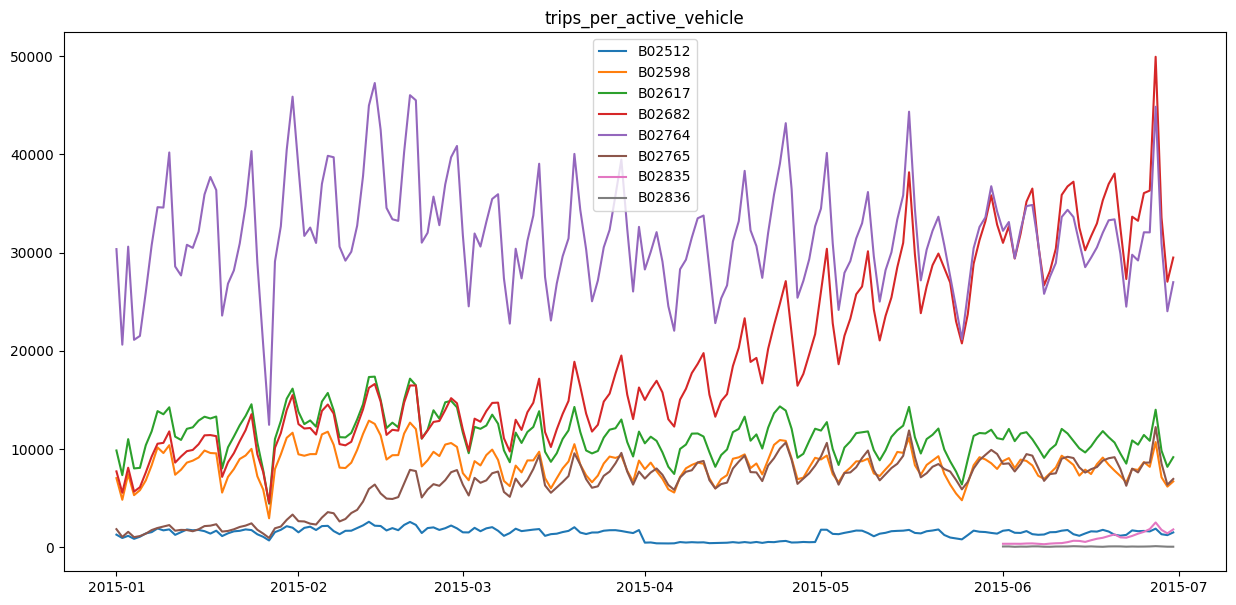

In [174]:
# plot trend across the two months
plt.figure(figsize=(15,7))
for base in dispatch_bases:
    plt.plot(df_raw_date_dispatch.loc[base].index, df_raw_date_dispatch.loc[base]['count'], label=base)
    plt.title(col)
    plt.legend()

B02682 shows significant uptrend, B02765 shows slight uptrend in the beginning of the yearwhile the others are pretty consistent. B02835 and B02836 only joined in June.

now take a look at the hour of the day

In [205]:
df_raw_hour = df_raw.groupby('hour').size()

<Axes: xlabel='hour'>

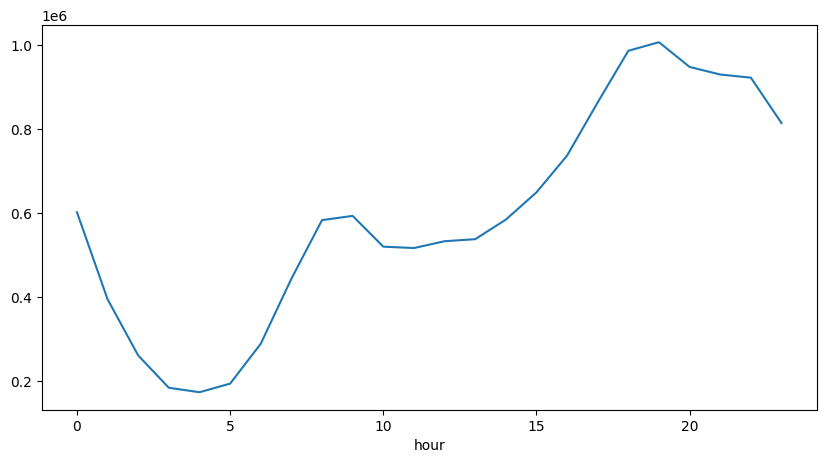

In [227]:
plt.figure(figsize=(10,5))
df_raw_hour.plot()

In [228]:
df_raw_day_dow = df_raw.groupby(['dow', 'hour']).size()
df_raw_day_dow = df_raw_day_dow.unstack(level=1).transpose()
df_raw_day_dow = df_raw_day_dow.sort_index(ascending=False)

<Axes: xlabel='dow', ylabel='hour'>

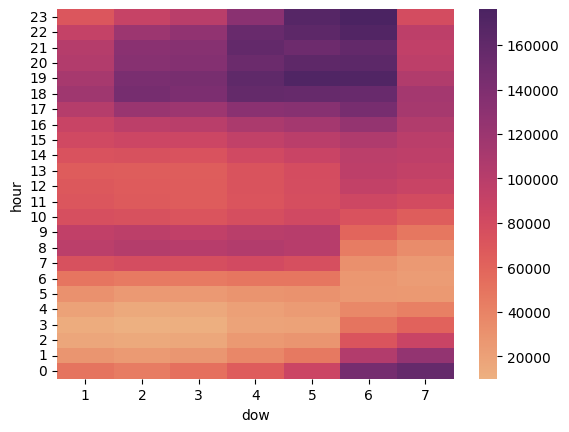

In [229]:
sns.heatmap(df_raw_day_dow, cmap='flare')

we can see that most rides are made on Friday and Saturday nights.

## build a time series prediction model to predict number of trips ##

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

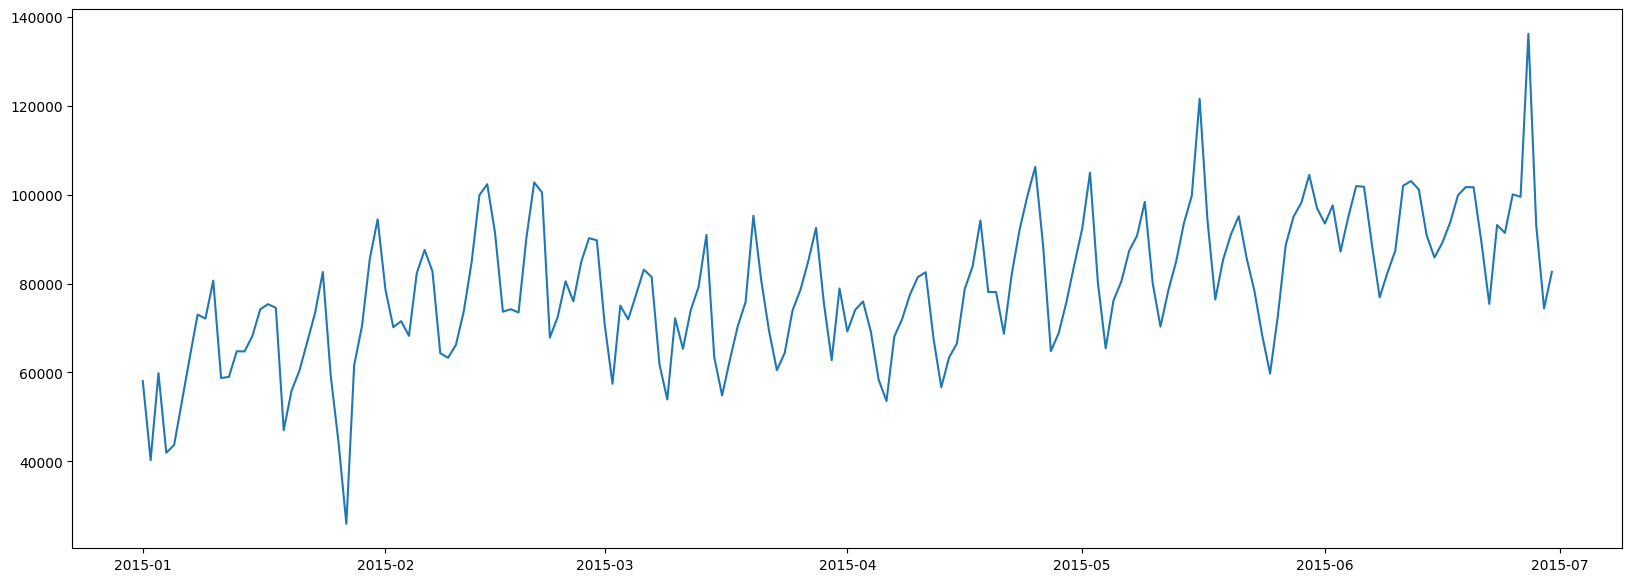

In [8]:
# plot #trips per day again
plt.figure(figsize=(20,7))
plt.plot(df_raw_date)

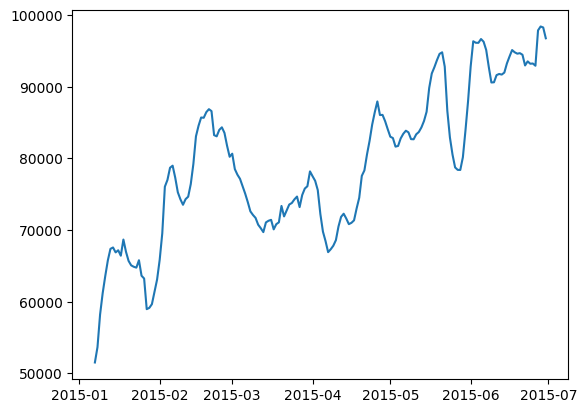

In [18]:
# plot rolling mean
rolling_mean = df_raw_date['count'].rolling(7).mean()
plt.plot(rolling_mean)

In [19]:
# split into train and test
df_train = df_raw_date['2015-01-01':'2015-05-15']
df_test = df_raw_date['2015-05-15':]

In [21]:
# adfuller test to test stationarity
res = adfuller(df_raw_date['count'], autolag='AIC')
print('test statistic:', res[0])
print('p-value:', res[1])
print('used lag:', res[2])
print('number of observations', res[3])
print('critical values:', res[4])

test statistic: -1.3107109779930184
p-value: 0.6242578927299274
used lag: 14
number of observations 166
critical values: {'1%': -3.4703698981001665, '5%': -2.8791138497902193, '10%': -2.576139407751488}


our test statistic is p-value is big, which means we fail to reject the null hypothesis that the time series has a unit root. We conclude that the time series is not stationary

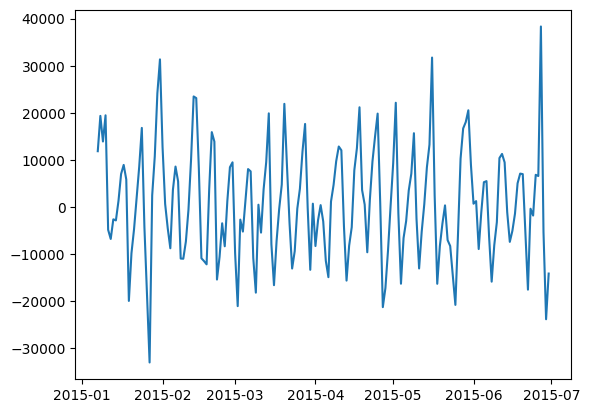

In [20]:
# let's say if dropping the trend gives us stationarity
ts_minus_ma = df_raw_date['count'] - rolling_mean
ts_minus_ma = ts_minus_ma.dropna()
plt.plot(ts_minus_ma)

In [22]:
# adfuller test to test stationarity
res = adfuller(ts_minus_ma, autolag='AIC')
print('test statistic:', res[0])
print('p-value:', res[1])
print('used lag:', res[2])
print('number of observations', res[3])
print('critical values:', res[4])

test statistic: -3.819432490419421
p-value: 0.0027146368394073295
used lag: 14
number of observations 160
critical values: {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}


if we subtract the rolling mean from each day and get rid of the trend, we now have stationarity.

Now look at the differenced time series, which also serves the purpose of getting rid of the trend

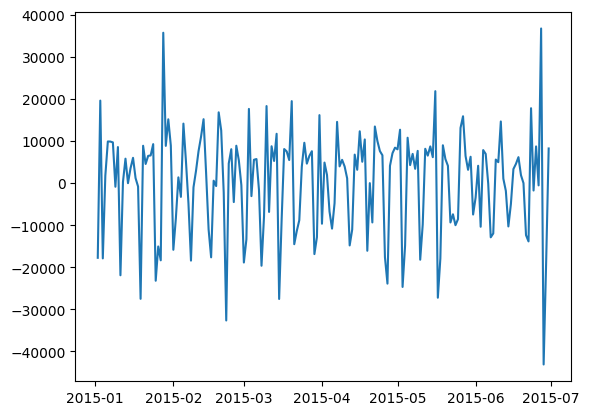

In [15]:
ts_1st_diff = df_raw_date['count'] - df_raw_date.shift()['count']
ts_1st_diff = ts_1st_diff.dropna()
plt.plot(ts_1st_diff)

In [29]:
# adfuller test to test stationarity
res = adfuller(ts_1st_diff, autolag='AIC')
print('test statistic:', res[0])
print('p-value:', res[1])
print('used lag:', res[2])
print('number of observations', res[3])
print('critical values:', res[4])

test statistic: -5.437245481735658
p-value: 2.827592331931148e-06
used lag: 13
number of observations 166
critical values: {'1%': -3.4703698981001665, '5%': -2.8791138497902193, '10%': -2.576139407751488}


can also conclude that the 1st order differenced time series is stationary.

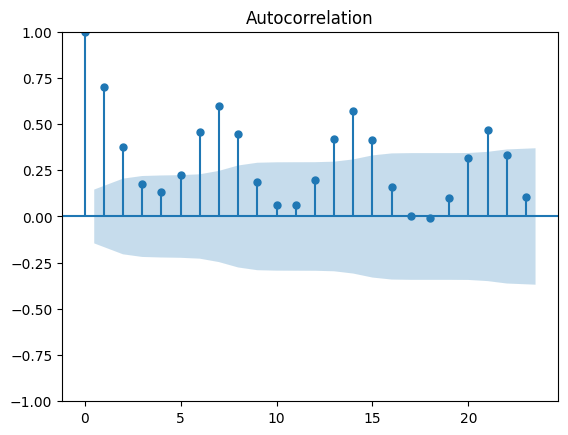

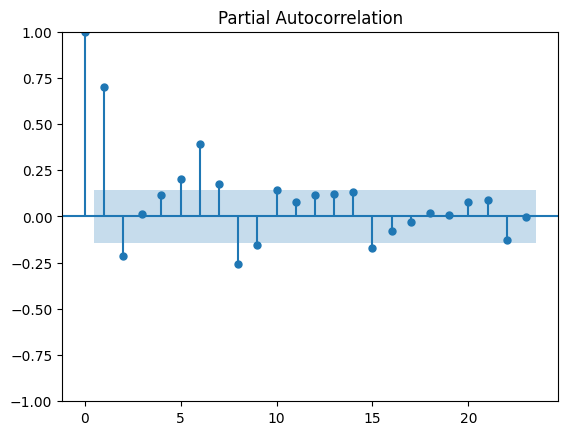

In [104]:
plot_acf(df_raw_date);
plot_pacf(df_raw_date);

Now look at the autocorrelation plot and partial autocorrelation plot for the 1st order differenced series

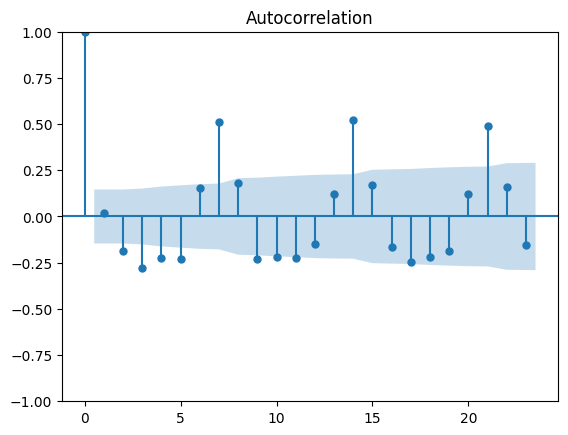

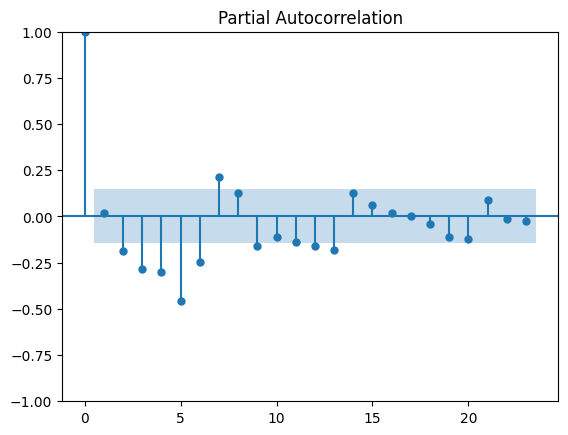

In [103]:
plot_acf(ts_1st_diff);
plot_pacf(ts_1st_diff);

try seasonal differencing

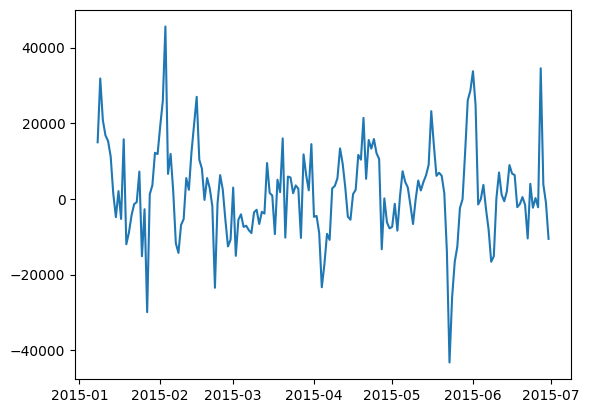

In [63]:
ts_seasonal_diff = df_raw_date['count'] - df_raw_date.shift(7)['count']
ts_seasonal_diff = ts_seasonal_diff.dropna()
plt.plot(ts_seasonal_diff)

the plot looks a lot smoother than just doing 1st order differencing

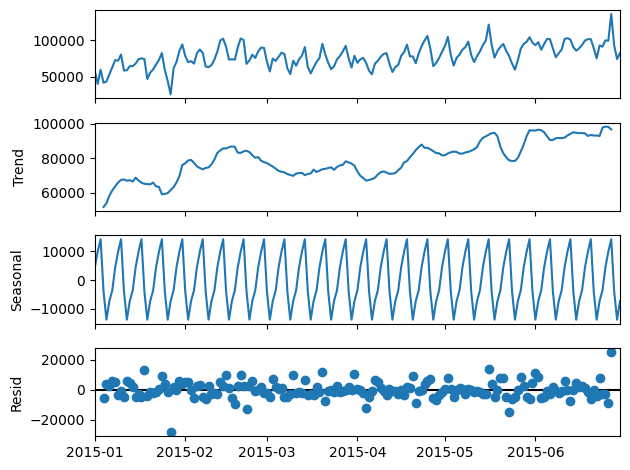

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df_raw_date, model='additive')
decomposed.plot();

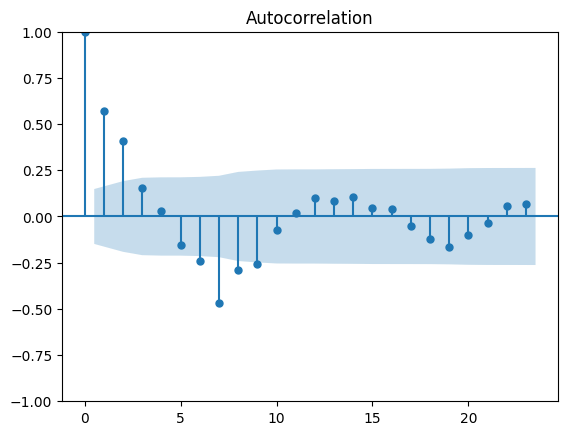

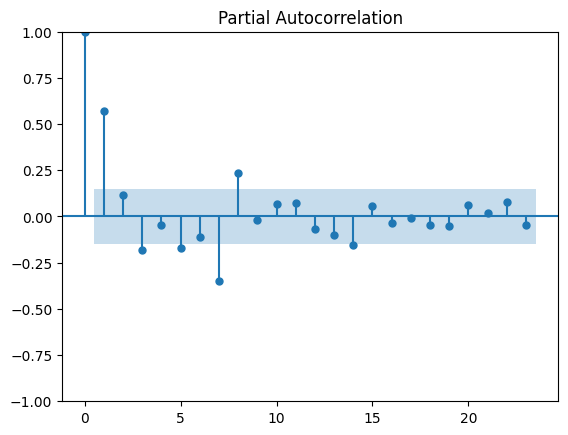

In [105]:
plot_acf(ts_seasonal_diff);
plot_pacf(ts_seasonal_diff);

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
# now try fitting an ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

min_aic = 10000
order = (0,0,0,0)
for seasonal_order in [(0,1,0,7), (0,1,1,7), (1,0,0,7), (1,1,0,7), (1,2,0,7), (1,1,1,7)]:
    print('current order is', seasonal_order)
    model = SARIMAX(df_train['count'], order=(0,1,0), seasonal_order=seasonal_order)
    results = model.fit()
    print(results.summary())

current order is (0, 1, 0, 7)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00738D+01    |proj g|=  5.65006D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   5.650D-06   1.007D+01
  F =   10.073836379260511     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                     
Dep. Variable:                             count   No. Observations:      

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.95344D+00    |proj g|=  8.28705D-02

At iterate    5    f=  9.94784D+00    |proj g|=  4.44693D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   4.447D-06   9.948D+00
  F =   9.9478401244230756     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                     
Dep. Variable:                            

 This problem is unconstrained.
 This problem is unconstrained.


                                     SARIMAX Results                                     
Dep. Variable:                             count   No. Observations:                  135
Model:             SARIMAX(0, 1, 0)x(1, 2, 0, 7)   Log Likelihood               -1318.755
Date:                           Thu, 28 Mar 2024   AIC                           2641.510
Time:                                   21:46:11   BIC                           2647.085
Sample:                               01-01-2015   HQIC                          2643.774
                                    - 05-15-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.6393      0.052    -12.271      0.000      -0.741      -0.537
sigma2      1.832e+08   3.54e-11   5.17e+18

In [130]:
model = SARIMAX(df_train['count'], order=(0,1,0), seasonal_order=(0,1,1,7))
results = model.fit()
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.85177D+00    |proj g|=  3.59845D-02

At iterate    5    f=  9.84352D+00    |proj g|=  3.50990D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   3.510D-06   9.844D+00
  F =   9.8435176540526719     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                      
Dep. Variable:                          

 This problem is unconstrained.


In [131]:
fitted_train = results.fittedvalues
predicted_test = results.predict(start=df_test.index[0], end=df_test.index[-1])

In [132]:
fitted_all = pd.concat([fitted_train, predicted_test])
fitted_all

2015-01-01         0.000000
2015-01-02     58045.000000
2015-01-03     40287.000000
2015-01-04     59844.000000
2015-01-05     41943.000000
                  ...      
2015-06-26    116543.107427
2015-06-27    121037.145136
2015-06-28    103334.454668
2015-06-29     93172.157047
2015-06-30     99752.211146
Length: 182, dtype: float64

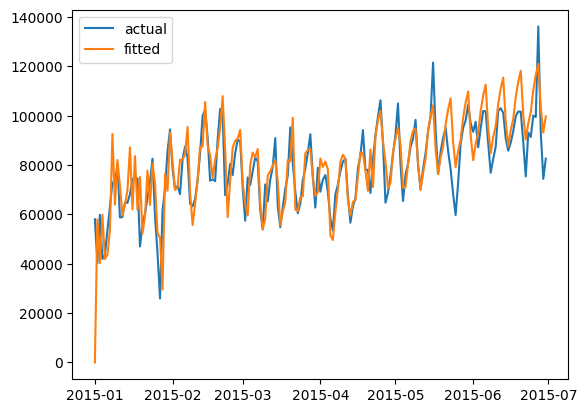

In [133]:
plt.plot(df_raw_date, label='actual')
plt.plot(fitted_all, label='fitted')
plt.legend()

### try XGBoost model for time series prediction ###

In [8]:
# extract more features for the data frame
df_raw_date['dow'] = pd.to_datetime(df_raw_date.index).day_of_week
df_raw_date['month'] = pd.to_datetime(df_raw_date.index).month

In [9]:
from scipy.fft import fft
def process_features(df, window=7):
    # add diff, rolling mean, fourier transform, 
    df['diff'] = df['count'].diff()
    df['rm'] = df['count'].rolling(window).mean()
    df['fft'] = np.abs(fft(df['count'].values))
    
    return df.dropna()

In [10]:
df_raw_date_processed = process_features(df_raw_date.copy())
df_raw_date_processed

,count,dow,month,diff,rm,fft
date,,,,,,
2015-01-07,63375,2,1,9836.0,51530.142857,304478.548669
2015-01-08,73016,3,1,9641.0,53668.857143,48837.304948
2015-01-09,72124,4,1,-892.0,58217.000000,302913.161257
2015-01-10,80656,5,1,8532.0,61190.142857,394582.238460
2015-01-11,58751,6,1,-21905.0,63591.285714,245136.883384
...,...,...,...,...,...,...
2015-06-26,99508,4,6,-565.0,92930.142857,113186.270322
2015-06-27,136193,5,6,36685.0,97862.428571,313898.909550
2015-06-28,93108,6,6,-43085.0,98408.571429,563122.619545


In [11]:
df_train = df_raw_date_processed[:'2015-05-15']
df_test = df_raw_date_processed['2015-05-15':]

y_train = df_train['count']
X_train = df_train.drop('count', axis=1)

y_test = df_test['count']
X_test = df_test.drop('count', axis=1)

In [12]:
from xgboost import XGBRegressor

reg = XGBRegressor()
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: >

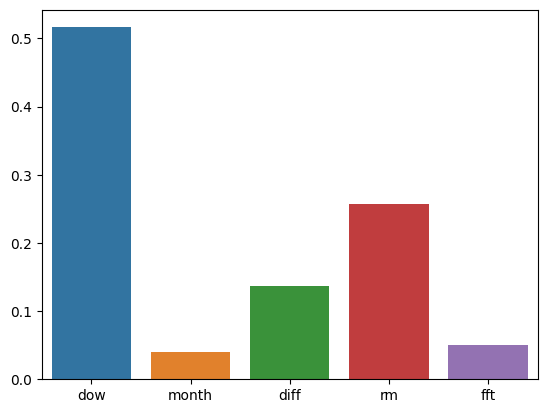

In [13]:
sns.barplot(x=X_train.columns, y=reg.feature_importances_)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# look at training set error
fitted_train = reg.predict(X_train)
mae = mean_absolute_error(fitted_train, y_train)
mse = mean_squared_error(fitted_train, y_train)
print(mae, mse)

0.5899648740310077 0.7085920230362767


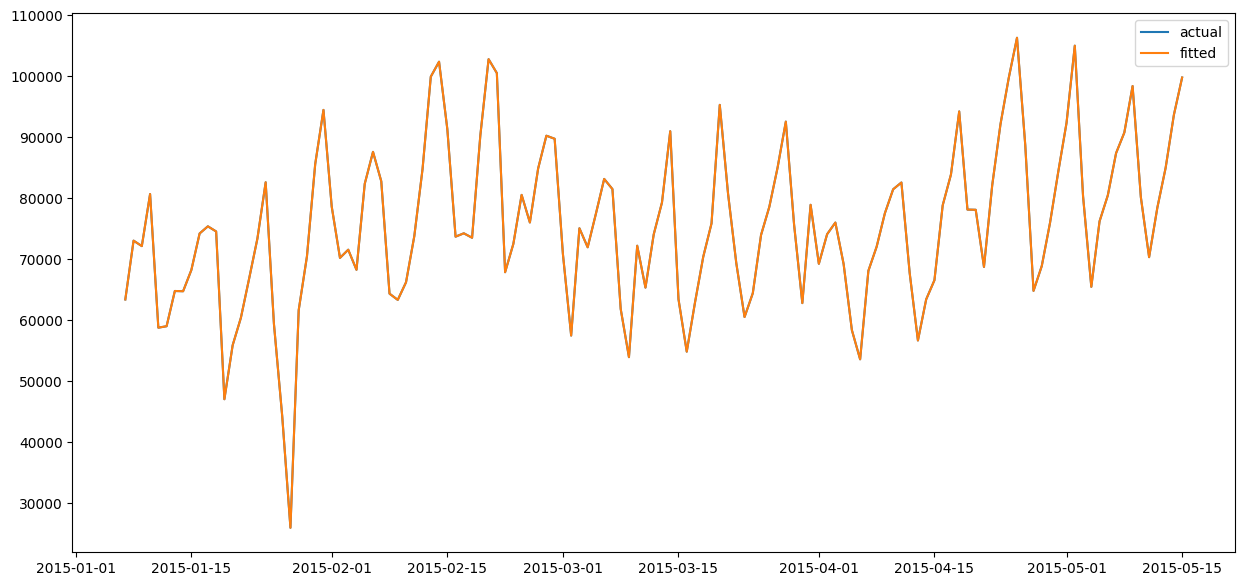

In [15]:
plt.figure(figsize=(15,7))
plt.plot(X_train.index, y_train, label='actual')
plt.plot(X_train.index, fitted_train, label='fitted')
plt.legend()

In [16]:
y_pred = reg.predict(X_test)
mae_test = mean_absolute_error(y_pred, y_test)
mse_test = mean_squared_error(y_pred, y_test)
print(mae_test, mse_test)

10723.90392287234 175892358.1570889


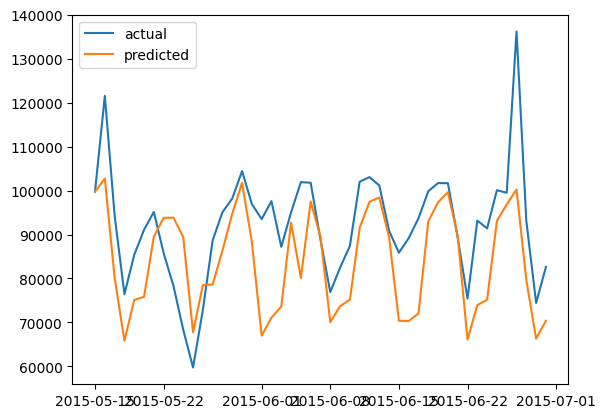

In [18]:
plt.plot(df_test.index, y_test, label='actual')
plt.plot(df_test.index, y_pred, label='predicted')
plt.legend()

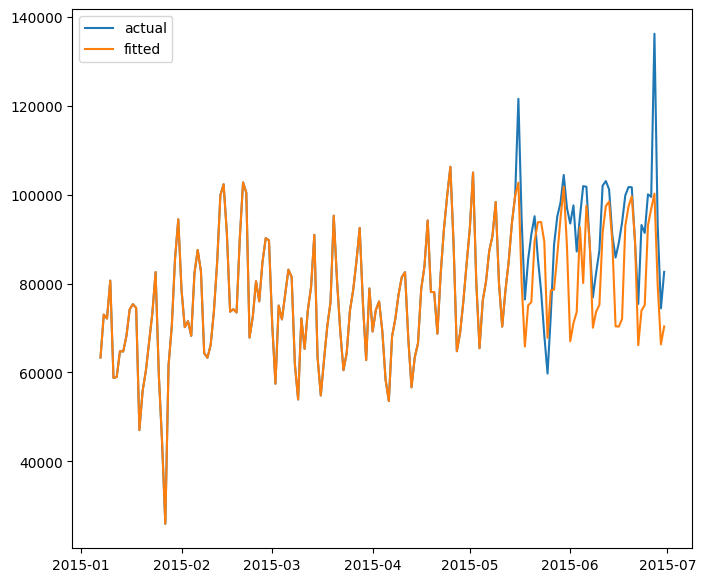

In [34]:
fitted_y = np.concatenate((fitted_train[:-1], y_pred))
plt.figure(figsize=(8,7))
plt.plot(df_raw_date_processed.index, df_raw_date_processed['count'], label='actual')
plt.plot(df_raw_date_processed.index, fitted_y, label='fitted')
plt.legend()